# 📖 Marco Teórico

El análisis de modelos matemáticos y estadísticos requiere métricas para evaluar su desempeño y herramientas para representar funciones.  
En este apartado se presentan los fundamentos teóricos del **Error Cuadrático Medio (MSE)** y la función `np.polyval` de **NumPy**, ampliamente utilizadas en regresión y ajuste de modelos.

---

## 1. Error Cuadrático Medio (MSE)

El **Mean Squared Error (MSE)** es una de las métricas más utilizadas para evaluar la precisión de un modelo.  
Se define como el promedio de los cuadrados de las diferencias entre los valores observados ($y_i$) y los valores predichos ($\hat{y}_i$):

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Donde:
- $y_i$ = valor real u observado.  
- $\hat{y}_i$ = valor estimado o predicho.  
- $n$ = número de observaciones.

El **MSE** penaliza de manera más fuerte los errores grandes debido al cuadrado de las diferencias, lo que lo convierte en un indicador sensible a valores atípicos.  

La **Raíz del Error Cuadrático Medio (RMSE)** es simplemente la raíz cuadrada del MSE:

$$
RMSE = \sqrt{MSE}
$$

y se interpreta en las mismas unidades de la variable de estudio, lo que facilita su comprensión.

---

## 2. Polinomios y `np.polyval`

En el análisis numérico y en la estadística aplicada, los **polinomios** se utilizan para aproximar funciones y ajustar modelos.  
Un polinomio de grado $n$ se expresa como:

$$
P(x) = a_n x^n + a_{n-1} x^{n-1} + \dots + a_1 x + a_0
$$

donde $a_n, a_{n-1}, \dots, a_0$ son los coeficientes del polinomio.

La función `np.polyval` de la librería **NumPy** permite **evaluar un polinomio** en uno o varios puntos $x$.  
Su sintaxis básica es:

```python
np.polyval(p, x)

# 📖 3 – Normalización de Datos en el Rango [-2, 2]

La **normalización** es un proceso matemático que ajusta los datos a un rango específico, manteniendo su estructura relativa pero modificando su escala.  
Su propósito principal es mejorar la comparabilidad entre variables y la estabilidad de los modelos estadísticos y de machine learning.

---

## 3.1. Centrado respecto a la media

Antes de normalizar, es común **centrar los datos en torno a cero** restando la media:

$$
l_i' = l_i - \bar{l}
$$

donde:

- $l_i$ = valor original,  
- $\bar{l}$ = media de todos los valores,  
- $l_i'$ = valor centrado.

Esto genera una serie con **media cero**, eliminando sesgos de desplazamiento.

Ejemplo:

Si $l = [5, 6, 7]$, entonces $\bar{l} = 6$ y los valores centrados son:

$$
l' = [-1, 0, 1]
$$

---

## 3.2. Escalamiento al rango [-2, 2]

Una vez centrados los datos, se pueden escalar a un rango definido.  
Para transformar cualquier serie $l$ al rango $[a, b]$, se usa:

$$
l_i'' = \frac{l_i - \min(l)}{\max(l) - \min(l)} \cdot (b - a) + a
$$

En el caso particular de $a = -2$ y $b = 2$:

$$
l_i'' = \frac{l_i - \min(l)}{\max(l) - \min(l)} \cdot 4 - 2
$$

Esto garantiza que los valores mínimos se transformen en $-2$ y los máximos en $2$.

---

## 3.3. Razones para usar [-2, 2] en lugar de [-1, 1]

- Permite **mayor dispersión relativa**, resaltando valores extremos.  
- Mejora la **estabilidad numérica** en algunos algoritmos de optimización.  
- En análisis financiero, facilita la detección de **anomalías y patrones atípicos**.  
- Mantiene la simetría alrededor de cero, coherente con datos centrados.

---

## 3.4. Resumen

- La operación `l -= l.mean()` centra los datos, garantizando media cero.  
- La normalización a $[-2, 2]$ ajusta la escala, preservando la forma de la distribución.  
- Este procedimiento mejora la comparabilidad, facilita el análisis y beneficia a los modelos estadísticos y de machine learning.

---

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2026-01-16,2075.010010,2110.040039,2061.620117,2104.739990,546800
2026-01-20,2034.819946,2110.360107,2028.209961,2049.040039,535800
2026-01-21,2057.770020,2093.510010,2032.010010,2045.000000,942900
2026-01-22,2153.750000,2166.000000,2111.010010,2113.409912,872900
2026-01-23,2137.290039,2153.459961,2100.310059,2145.000000,467100


Date
2020-01-31    663.000000
2020-02-29    616.030029
2020-03-31    488.579987
2020-04-30    583.510010
2020-05-31    851.669983
Freq: ME, Name: Close, dtype: float64

Date
2025-09-30    2336.939941
2025-10-31    2327.260010
2025-11-30    2071.780029
2025-12-31    2014.260010
2026-01-31    2137.290039
Freq: ME, Name: Close, dtype: float64

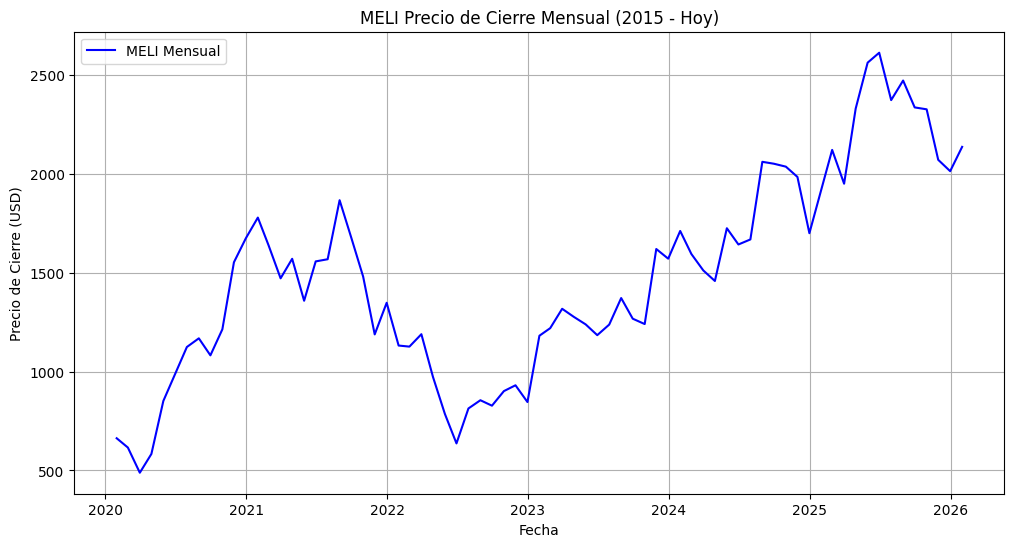

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

from datetime import date, datetime

ticker = "MELI" #"BTC-USD"
start_date = "2020-01-01"
end_date = date.today().strftime("%Y-%m-%d")
# Descargar datos del ticker desde 2015 hasta hoy
data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)

#droplabel columns multiindex
data.columns = data.columns.droplevel(1)
display(data.tail())
# Re-muestrear a datos mensuales (último cierre de cada mes)
monthly = data['Close'].resample('ME').last()
display(monthly.head())
display(monthly.tail())
# Graficar
plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly, label=f"{ticker} Mensual", color="blue")
plt.title(f"{ticker} Precio de Cierre Mensual (2015 - Hoy)")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre (USD)")
plt.legend()
plt.grid(True)
plt.show()

Centrado de los precios con respecto a la media

In [2]:
# Normalizar los datos para ver tendencias
l = monthly.values
l -= l.mean()
l

array([-811.7761636 , -858.7461343 , -986.19617703, -891.26615383,
       -623.10618069, -489.00614407, -350.15616848, -306.18619778,
       -392.29618313, -260.72611477,   78.55379246,  200.44380711,
        304.73384617,  163.33382175,   -2.63614895,   96.20381687,
       -116.10611965,   83.01387546,   93.92378757,  392.67378757,
        204.62386082,    6.24385593, -286.36612942, -126.37613918,
       -342.716105  , -348.12613918, -285.29618313, -501.14615871,
       -688.89615871, -837.90616848, -661.06614162, -619.41617825,
       -646.9961343 , -573.15616848, -543.78617336, -628.53617336,
       -293.08622219, -254.7761636 , -156.716105  , -197.28617336,
       -235.7761636 , -290.17618801, -236.72611477, -102.41617825,
       -206.89615871, -234.03617336,  145.68379734,   96.76387546,
        237.033895  ,  120.52388523,   37.18379734,  -16.07621243,
        250.80379246,  168.62386082,  194.12386082,  586.88374851,
        577.18379734,  562.40389011,  510.39388035,  225.66377

Escalamiento de rango de [-2 a 2] (en las fechas)

In [3]:
# f= fecha de -2 a 2 en lugar de las fechas
f = np.linspace(-2, 2, len(l))
f

array([-2.        , -1.94444444, -1.88888889, -1.83333333, -1.77777778,
       -1.72222222, -1.66666667, -1.61111111, -1.55555556, -1.5       ,
       -1.44444444, -1.38888889, -1.33333333, -1.27777778, -1.22222222,
       -1.16666667, -1.11111111, -1.05555556, -1.        , -0.94444444,
       -0.88888889, -0.83333333, -0.77777778, -0.72222222, -0.66666667,
       -0.61111111, -0.55555556, -0.5       , -0.44444444, -0.38888889,
       -0.33333333, -0.27777778, -0.22222222, -0.16666667, -0.11111111,
       -0.05555556,  0.        ,  0.05555556,  0.11111111,  0.16666667,
        0.22222222,  0.27777778,  0.33333333,  0.38888889,  0.44444444,
        0.5       ,  0.55555556,  0.61111111,  0.66666667,  0.72222222,
        0.77777778,  0.83333333,  0.88888889,  0.94444444,  1.        ,
        1.05555556,  1.11111111,  1.16666667,  1.22222222,  1.27777778,
        1.33333333,  1.38888889,  1.44444444,  1.5       ,  1.55555556,
        1.61111111,  1.66666667,  1.72222222,  1.77777778,  1.83

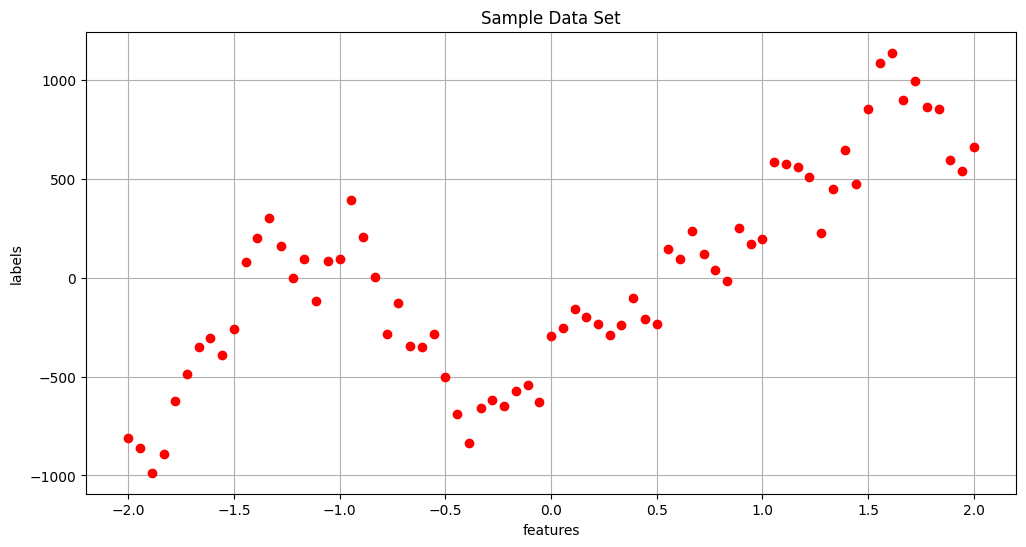

In [4]:
# Grafica l y f
plt.figure(figsize=(12,6))
plt.plot(f, l, 'ro')
plt.title('Sample Data Set')
plt.xlabel('features')
plt.ylabel('labels');
plt.grid(True)
plt.show()

Funcion que calcula MSE y RMSE

In [5]:
def MSE(l, p):
    # Funcion que calcula el "mse" y el "rmse" usando comp inputs:
    # "l" que son los precios Ecalados con respecto a la media (valores en y originales pero escalados)
    # y "p" que son los valores obtenidos (valores de 'y' usando los coeficientes del polinomio calulados abajo como 'reg')
    return np.mean((l - p) ** 2), np.sqrt(np.mean((l - p) ** 2))

Least squares polynomial fit

In [6]:
# Ajuste polinomial de grado n
deg = 3                         # grado del polinomio
reg = np.polyfit(f, l, deg=deg) # reg: regresion, Least squares polynomial fit.
reg

array([  79.22858233,  122.64289732,  121.56313582, -168.06619262])

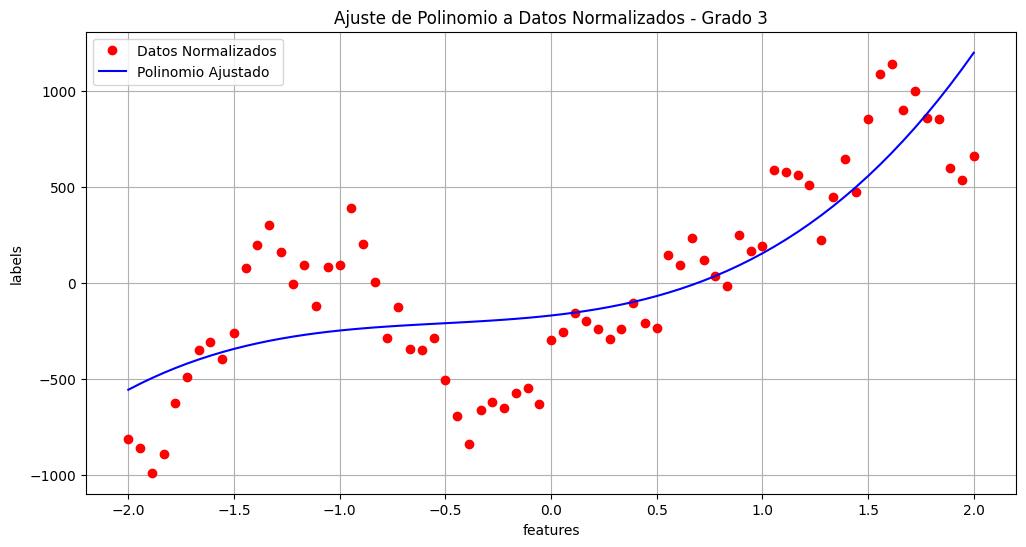

In [7]:
# grafica el polinomio ajustado
p = np.polyval(reg, f)  # reg = coeficientes del polinomio, f = fechas escaladas de [-2,2]
                        # p: elavualcion del polinomio (valores en y) en diferentes puntos (valores en x - fechas escaladas [-2,2]) 
                        # usando los coeficientes del poliniomo (reg)
    
plt.figure(figsize=(12,6))
plt.plot(f, l, 'ro', label='Datos Normalizados')
plt.plot(f, p, 'b-', label='Polinomio Ajustado')
plt.title(f'Ajuste de Polinomio a Datos Normalizados - Grado {deg}')
plt.xlabel('features')
plt.ylabel('labels');
plt.legend()
plt.grid(True)
plt.show()

In [8]:
def t_summary():
    print("Resumen del Ajuste del Modelo:")
    mse, rmse = MSE(l, p)
    print(f"Grado del Polinomio: {deg}")
    print(f"Ecuación del Polinomio: y = ", end="")
    for i, coef in enumerate(reg):
        power = len(reg) - i - 1
        if power > 0:
            print(f"{coef:.4f}x^{power} + ", end="")
        else:
            print(f"{coef:.4f}")
    print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
    print(f"Valor Máximo {max(l)} 2% = {max(l)*0.02} 5% = {max(l)*0.05}")
t_summary()

Resumen del Ajuste del Modelo:
Grado del Polinomio: 3
Ecuación del Polinomio: y = 79.2286x^3 + 122.6429x^2 + 121.5631x^1 + -168.0662
Error Cuadrático Medio (MSE): 92967.7600
Raíz del Error Cuadrático Medio (RMSE): 304.9061
Valor Máximo 1138.8537192148706 2% = 22.77707438429741 5% = 56.94268596074353


In [9]:
# Hacer un ciclo para probar diferentes grados de polinomio
for deg in range(1, 11):
    reg = np.polyfit(f, l, deg=deg)
    p = np.polyval(reg, f)
    mse, rmse = MSE(l, p)
    print(f"Grado: {deg}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

Grado: 1, MSE: 125500.7288, RMSE: 354.2608
Grado: 2, MSE: 102916.4562, RMSE: 320.8059
Grado: 3, MSE: 92967.7600, RMSE: 304.9061
Grado: 4, MSE: 36513.3809, RMSE: 191.0847
Grado: 5, MSE: 36212.1285, RMSE: 190.2948
Grado: 6, MSE: 34911.9070, RMSE: 186.8473
Grado: 7, MSE: 21889.8295, RMSE: 147.9521
Grado: 8, MSE: 21727.0026, RMSE: 147.4008
Grado: 9, MSE: 20303.4258, RMSE: 142.4901
Grado: 10, MSE: 19983.5759, RMSE: 141.3633


# Nota Imortante: 

Los valores RMSE que estan en este libro NO son USD ya que centramos los precios con respecto a la media. Solo habria que hacer el escalamiento a la inversa para ver el diferencial en USD.

Cuando usemos este libro para divisas solo poner atencion en la comparacion contra el 2% y 5%, en divisas las variaciones son muy pequenias y podrian parecer que los valores RMSE obtenidos son buenos pero si se presta atencion a los valores veremos que podrian no ser buenos. Ojo con los decimales.